# Equations of motion (2nd order ODEs)

We know that the motion of an object is determined by Newton’s
equations. In the one-dimensional case, we can define the instantaneous
position $y(t)$, velocity $v(t)$ and acceleration $a(t)$ of an object
using the language of differential calculus: 
$$v(t)=\frac{dy}{dt},
a(t)=\frac{dv}{dt}.
$$ 
The motion of the particle is defined by:
$$\frac{d^2y}{dt^2}=\frac{F(t)}{m}$$ 
This is a second order differential
equation that can written as two first order differential equations:
$$
\frac{dv}{dt}=\frac{F(t)}{m} \\
\frac{dy}{dt}v(t).$$ 
To solve it we can apply any of
the methods described in the previous sections. If we pick Euler’s, we
obtain: 

$$
\begin{align}
v_{n+1}&=&v_n+\frac{F(t)}{m}\Delta t = v_n+a_n\Delta t, \\
y_{n+1}&=&y_n+v_n\Delta t,\end{align}$$ 

where $a_n=F(t)/m$.
<!-- 
![forces1](figures/forces1.png).
#### Forces acting on an object: a) moving upward b) falling. -->

### Exercise 1.2: One dimensional motion
Write a program to solve the 1d equations of motion for a falling
object. Input values: 
- $y_0=y(t=0)$
- $v_0=v(t=0)$. 

Compare results with
different $\Delta t$ and the exact solution. Plot $y(t)$ and $v(t)$. Use
$y_0=10m$; $v_0=0$.


This is a godd time to introduce the concept of **objects** and object oriented programming in Python. We will first define a class "**particle**"

In [1]:
class particle(object):

    def __init__(self, mass=1., y=0., v=0.):
        self.mass = mass 
        self.y = y
        self.v = v

    def euler(self, f, dt): 
        self.y = self.y + self.v*dt
        self.v = self.v + f/self.mass*dt


In [5]:
pion = particle(0.139, 10.0, 1.0)
print(pion.mass, pion.y, pion.v)
pion.euler(2,.00001)
print(pion.mass, pion.y, pion.v)

0.139 10.0 1.0
0.139 10.00001 1.0001438848920863


We are now in position for a free falling particle. Let's start with imports and initializations

In [13]:
import numpy as np
from matplotlib import pyplot as plt 
import matplotlib

matplotlib.rcParams.update({'figure.dpi':75})

g = 9.8
mass = 0.01
y0 = 300.
v0 = 0.
vt = 30. # terminal velocity

dt = 0.0001

gforce = g*mass

p = particle(mass, y0, v0)
y = [y0]
v = [v0]
t = [0.]

Now we need a loop that solves the dynamics a long as the particle is above the ground.

In [14]:
while p.y > 0:
    fy = -gforce 
    p.euler(fy, dt)
    y.append(p.y)
    v.append(p.v)
    t.append(t[-1] + dt)

t_data, y_data, v_data = np.array(t), np.array(y), np.array(v)

Let's plot the velocities and positions

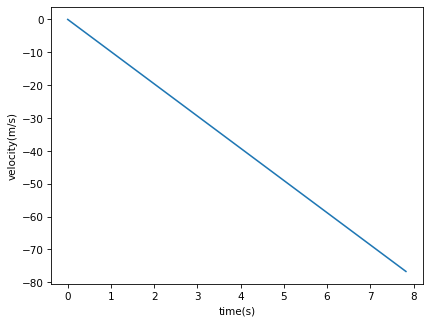

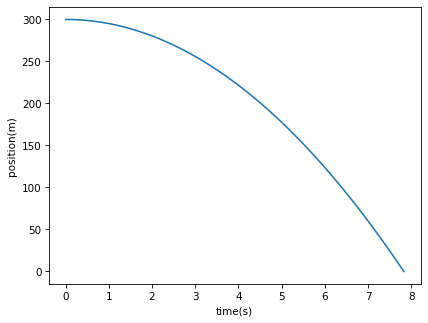

In [15]:
plt.plot(t_data, v_data, label='velocity')
plt.xlabel('time(s)')
plt.ylabel('velocity(m/s)')
plt.show() 

plt.plot(t_data, y_data, label='position')
plt.xlabel('time(s)')
plt.ylabel('position(m)')
plt.show()

### Exercise 1.3: Air resistance 
The form of the velocity-dependent force of the resistance of the air is
given by $$F_d=kv$$ where $k$ is a parameter that depends on the
properties of the medium and the shape of the object. Since $F$
increases as $v$ increases, there is a limiting velocity at which
$F_d=F_g=mg$ and the acceleration vanishes:

$$kv_t=mg \Rightarrow v_t=\frac{mg}{k}$$ 

In terms of the terminal speed,
the force $F_d$ can be rewritten as $$F_d=mg(\frac{v}{v_t}).$$ Hence,
the net force on a falling object is: $$F=mg(1-\frac{v}{v_t})$$

Let's try a slightly different version of this problem where the force $F_d$ varies  with the square of the velocity $F_d=k_2 v^2.$ 

1.  Derive the net force on a falling object using this
    expression, in units of the terminal velocity $v_t$

2.  Compute the speed at which a pebble of mass $m=10^{-2}kg$ reaches
    the ground if it’s dropped from rest at $y_0=50m$. Compare this
    speed to that of a freely falling object under the same conditions.
    Assume that the drag force is proportional to $v^2$ and the terminal
    speed is $v_t=30m/s$

See Mathematica notebook for the detailed solution to 2. The drag and freefall final velocities are 3.49057 and 3.19438, respectively.

The program will look pretty much identical to the previous one, but we need to introduce the drag force

Now we want to ignore drag, which can effectively be done by sending

$v_t \to \infty$

Of course, this physics is rather simple, but seeing the result come out so well in the numerical experiment helps give us confidence in them.

We solved the diff eq directly via numerical techniques. However, for some problems with harder diff eqs it's not so easy, and different approaches are worth considering.

### Question: how could you do this problem with a neural network?

Two dimensional trajectories
----------------------------

In a 2d trajectory, the direction of the drag force is opposite to the
speed vector ${\bf v}$. Newton’s equations of motion for $x$ and $y$
components are written $$\begin{aligned}
&& m\frac{dv_x}{dt}=-F_{d,x}; \\
&& m\frac{dv_y}{dt}=-mg-F_{d,y};\end{aligned}$$ Using $F_d=kv^2$,
$v_x=v\cos{\theta}$ and $v_y=v\sin{\theta}$, we find $$\begin{aligned}
&& \frac{dv_x}{dt}=-\frac{k}{m}vv_x, \\ 
&& \frac{dv_y}{dt}=-g-\frac{k}{m}vv_y, \end{aligned}$$ where
$v^2=v_x^2+v_y^2$. Hence, we cannot calculate the vertical motion of the
object without reference to the horizontal component.

![forces2](figures/forces2.png)
#### Object in a two dimensional trajectory under the effect of gravitational and dragging forces}


### Exercise 1.7: Trajectory of a shot 

Modify your code so that the 2d trajectory of an object can be computed,
and graphs of $y$ as a function of $x$ can be made.

1.  As a check on your program, first neglect the effect of air
    resistance so that you an compare to known results. Supouse that the
    object is thrown and $t_0$ with an angle $\theta _0$ with an initial
    velocity $v_0=15$m/s. Vary $\theta_0$ and show that the maximum
    range occurs at $\theta_0=45^{\circ}$ Compare your result with the
    exact value $v_0^2/g$

2.  Consider the effects of air resistance. Compute the maximum range,
    and the corresponding angle using $k/m=0.1$, $v_0=30$m/s.



### Challenge 1.4: 

Modify the previous code to include the effect of drag resistance, and solve Exercise 1.7, part 2.

#### An introduction to animations with matplotlib

Stability
---------

A major consideration in integrating differential equations is the
numerical stability of the algorithm used. Since we have replaced the
differential equation by a difference equation, we know that our results
will not be exact. Discrepancies will arise when using different step
sizes, for instance. This is the “truncation error” and depends on the
method employed. Other errors that do not originate in the method
correspond to the roundoffs performed by the computer, since it does not
work with real numbers, but with a finite number of digits determined by
the hardware. These roundoff errors will accumulate and can become
significant in some cases.

In practice we determine the accuracy of our solutions by reducing the
value of the step until the solutions unchanged at the desired level of
accuracy.

In addition to accuracy, another important factor is the stability of
the algorithm. For instance, it may occur that the numerical results are
very good for short times, but diverge from the “true” solution for
longer times. Such an algorithm is said to be “unstable” for the
particular problem.





